In [21]:
ACC_FREQ = 100

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
%matplotlib inline

In [18]:
DATA_PATH = 'https://physionet.org/files/accelerometry-walk-climb-drive/1.0.0/raw_accelerometry_data/id1c7e64ad.csv?download'
data = pd.read_csv(DATA_PATH)
print(data.shape)
data.head()

(342700, 14)


,activity,time_s,lw_x,lw_y,lw_z,lh_x,lh_y,lh_z,la_x,la_y,la_z,ra_x,ra_y,ra_z
0,99,0.01,-0.316,1.191,-0.145,0.012,1.109,-0.043,0.043,1.004,-0.094,-0.082,1.012,-0.098
1,99,0.02,-0.555,-0.027,1.164,-0.273,0.031,1.117,-0.402,0.262,1.242,-0.430,0.359,0.742
2,99,0.03,-0.492,-0.258,1.188,-0.004,-0.457,1.707,-0.281,0.652,1.426,-0.332,0.715,1.063
3,99,0.04,-0.500,-0.297,0.316,0.230,-0.559,1.059,-0.098,0.906,0.625,-0.176,0.945,0.422
4,99,0.05,-0.598,-0.375,-0.070,0.316,-0.617,0.750,-0.035,0.980,0.270,-0.113,1.012,0.160


Text(0, 0.5, 'Acceleration (g)')

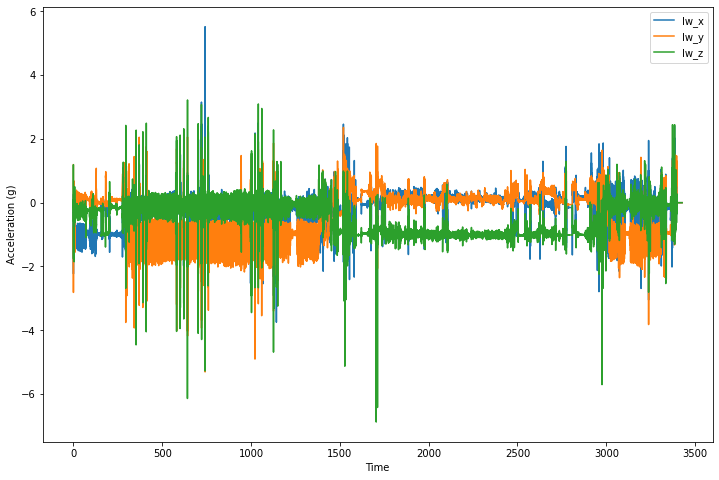

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

for loc in ['lw']:
    
    for axis in ['x','y','z']:
        
        ax.plot(data['time_s'], data[f'{loc}_{axis}'], label=f'{loc}_{axis}')
        
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Acceleration (g)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Activity')

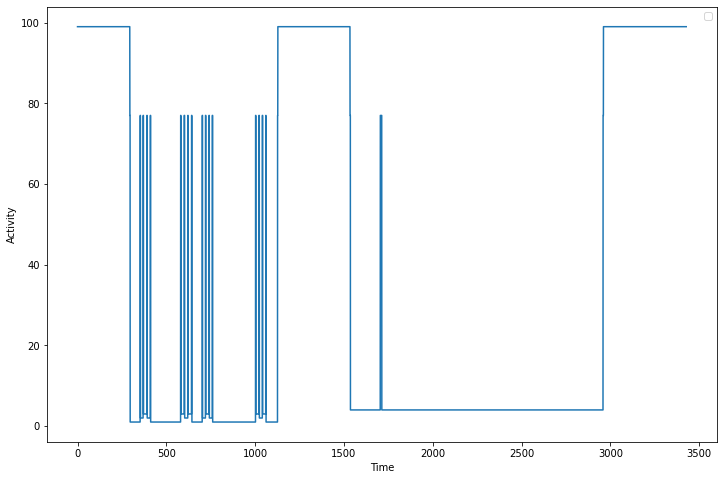

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(data['time_s'], data['activity'])
        
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Activity')

In [23]:
t_start = 0
t_end = t_start + ACC_FREQ*30

sample = data.iloc[t_start:t_end]
sample

,activity,time_s,lw_x,lw_y,lw_z,lh_x,lh_y,lh_z,la_x,la_y,la_z,ra_x,ra_y,ra_z
0,99,0.01,-0.316,1.191,-0.145,0.012,1.109,-0.043,0.043,1.004,-0.094,-0.082,1.012,-0.098
1,99,0.02,-0.555,-0.027,1.164,-0.273,0.031,1.117,-0.402,0.262,1.242,-0.430,0.359,0.742
2,99,0.03,-0.492,-0.258,1.188,-0.004,-0.457,1.707,-0.281,0.652,1.426,-0.332,0.715,1.063
3,99,0.04,-0.500,-0.297,0.316,0.230,-0.559,1.059,-0.098,0.906,0.625,-0.176,0.945,0.422
4,99,0.05,-0.598,-0.375,-0.070,0.316,-0.617,0.750,-0.035,0.980,0.270,-0.113,1.012,0.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,99,29.96,-0.977,0.301,-0.504,0.250,-0.816,0.180,-0.066,1.020,0.023,0.035,1.270,0.074
2996,99,29.97,-1.020,0.313,-0.484,0.270,-0.816,0.164,-0.094,1.020,0.039,0.008,1.363,0.039
2997,99,29.98,-1.070,0.320,-0.449,0.270,-0.801,0.160,-0.098,1.031,0.055,-0.027,1.453,-0.012
2998,99,29.99,-1.156,0.313,-0.414,0.262,-0.785,0.156,-0.098,1.031,0.055,-0.059,1.563,-0.059


Text(0, 0.5, 'Acceleration (g)')

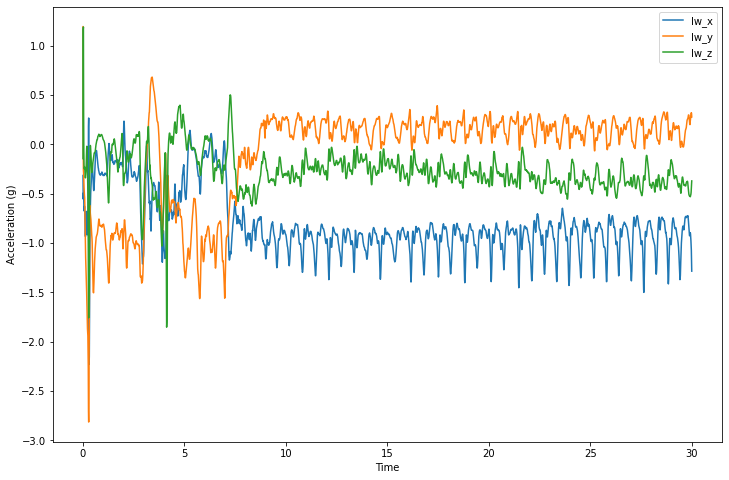

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

for loc in ['lw']:
    
    for axis in ['x','y','z']:
        
        ax.plot(sample['time_s'], sample[f'{loc}_{axis}'], label=f'{loc}_{axis}')
        
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Acceleration (g)')

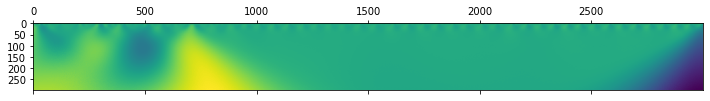

In [34]:
coef, freqs=pywt.cwt(sample['lw_x'], np.arange(1,301), 'gaus1')

fig, ax = plt.subplots(figsize=(12, 8))

ax.matshow(coef) 

In [26]:
coef.shape

(128, 3000)

In [28]:
freqs.shape

(128,)